<a href="https://colab.research.google.com/github/enigma6174/tensorflow-learn/blob/develop/regression/medical_cost_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
# load the dataset into a dataframe
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# check the data types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
# convert the dataframe into a one-hot encoded data frame
dataset = pd.get_dummies(df)
dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [22]:
# split the dataset into X and y
X = dataset.drop("charges", axis=1)
y = dataset["charges"]

In [23]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [24]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [28]:
# split the data into train and test sets with testing data as 20% of original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

In [46]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(1e-2),
              metrics=['mae'])

# train the model
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
34/34 [==============================] - 1s 2ms/step - loss: 10651.7285 - mae: 10651.7285
Epoch 2/50
34/34 [==============================] - 0s 2ms/step - loss: 7385.8643 - mae: 7385.8643
Epoch 3/50
34/34 [==============================] - 0s 2ms/step - loss: 7016.3345 - mae: 7016.3345
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 6558.5078 - mae: 6558.5078
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 6301.0488 - mae: 6301.0488
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 5840.7402 - mae: 5840.7402
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 4985.4448 - mae: 4985.4448
Epoch 8/50
34/34 [==============================] - 0s 2ms/step - loss: 3925.7673 - mae: 3925.7673
Epoch 9/50
34/34 [==============================] - 0s 2ms/step - loss: 3491.9890 - mae: 3491.9890
Epoch 10/50
34/34 [==============================] - 0s 2ms/step - loss: 3337.6807 - mae: 3337.6807
Epoch 1

In [43]:
# evaluate the model
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1933.6309 - mae: 1933.6309


[1933.630859375, 1933.630859375]

Text(0.5, 0, 'epochs')

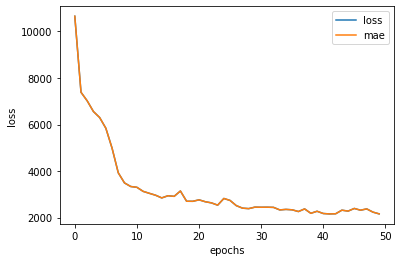

In [47]:
# plot training curve
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

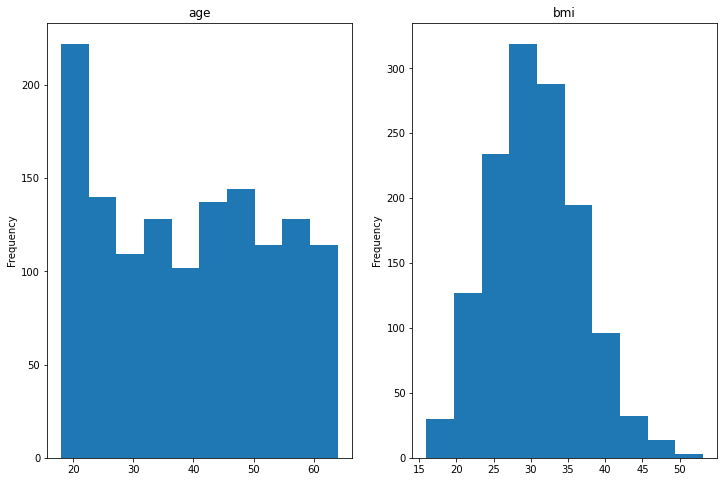

In [51]:
plt.figure(figsize=(12, 8))

# plot the age 
plt.subplot(1, 2, 1)
X['age'].plot(kind='hist')
plt.title('age')

# plot the bmi
plt.subplot(1, 2, 2)
X['bmi'].plot(kind='hist')
plt.title('bmi')

# show the plots
plt.show()